In [1]:
import cryoenv.cryosig as cs
import numpy as np
import matplotlib.pyplot as plt
import pickle

%config InlineBackend.figure_formats = ['svg']

In [2]:
names = ['li1p', 'li1l', 'li2p']

pars = {}

name = names[1]

In [3]:
with open("saved_pars/{}_pars.pkl".format(name),"rb") as fh:
    pars[name] = pickle.load(fh)

In [4]:
pars['li1l']['Tc'][0] = 22.97552941

In [5]:
# standard scenario
det = cs.DetectorModel(**pars[name])

In [6]:
# only for light detector: tune delta_h

det.delta_h = np.array([[.99, 1 - .99], ])

det.Gb[0] = 0.5
det.Gb[1] = 0.005
Gea = 0.005
det.G[0,1] = Gea
det.G[1,0] = Gea
det.eps[1,0] = 0.37
det.eps[1,1] = 1 - 0.37

In [7]:
det.Tc

array([22.97552941])

In [8]:
det.wait(5)

/Users/felix/.pyenv/versions/3.10.10/lib/python3.10/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [9]:
det.T[-1]

array([36.07877259, 36.16737194])

set correct DAC

In [12]:
# bnds = {'li1p': (0.,2.), 'li1l': (1.,3.)}

# res = det.solve_dac(det.kwargs['R_op_target'], bnds[name])

In [13]:
# res

# li1p: 1.5876361223018052

In [14]:
# det.set_control(dac=np.array([res]), Ib=det.Ib)

In [15]:
# det.wait(5)

In [16]:
# det.T[-1]

finetune pulse shape parameters

In [17]:
# nope!

find effective heater resistance

In [10]:
det.set_control(dac=pars[name]['dac'], Ib=det.Ib)

In [11]:
det.wait(5)

In [12]:
det.T

array([[36.07877259, 36.16737189],
       [36.07877259, 36.16737189],
       [36.07877259, 36.16737189],
       ...,
       [36.07877259, 36.16737189],
       [36.07877259, 36.16737189],
       [36.07877259, 36.16737189]])

In [13]:
bnds = {'li1p': (1.,10.), 'li1l': (.1, 20.)}

res = det.solve_Rh(det.kwargs['R_op_target'], bnds[name])

In [14]:
res

# li1p: 6.36886049760936

7.059751898041253

find suitable epsilon

In [23]:
# res = det.solve_collection_efficiency(0.01*(5.9 * 8/9 + 1/9 * 6.4), 0.01*3.3, (0., 0.9))

In [24]:
# res

# li1p: 0.11021680074920875

find suitable pulser scaler

In [25]:
# res = det.solve_pulser_scale(1., 0.032, (0.0, .3))

In [26]:
# res

# li1p: 

In [15]:
det.pulser_scale = np.array([0.025/4])

find suitable delta

In [16]:
res = det.solve_delta(1., 0.032, (0.0, 1.0))

In [17]:
res

0.5867938578883373

T0 is [22.9272103  22.94445127] mK.
Calculated in 0.5188210010528564 s.
Generated noise in 0.006104230880737305 s.


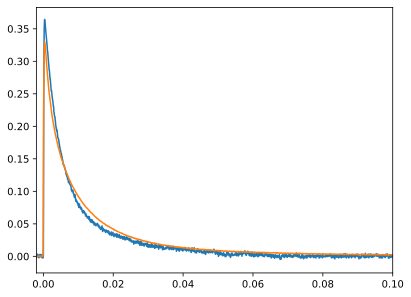

T0 is [22.9272103  22.94445127] mK.
Calculated in 0.42642903327941895 s.
Generated noise in 0.006234169006347656 s.


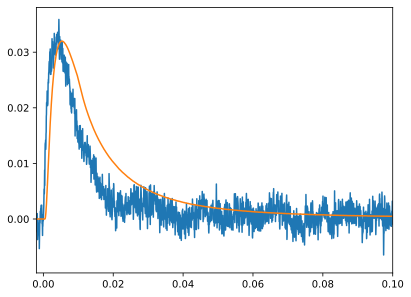

22.92721030406807 0.03737449232749514


In [18]:
det.wait(5)

det.trigger(er=np.array([0., 0.1*(5.9 * 8/9 + 1/9 * 6.4)]), tpa=np.array([0.0]))

evsim = det.get_record()

plt.plot(det.kwargs['sev'][:,0], evsim)
plt.plot(det.kwargs['sev'][:,0] + 0.0013, det.kwargs['sev'][:,1]*3.3*0.1)
plt.xlim(-0.002,0.1)
plt.show()

det.wait(5)

det.trigger(er=np.array([0., 0.]), tpa=np.array([1.]))

evsim = det.get_record()

plt.plot(det.kwargs['sev_tp'][:,0], evsim)
plt.plot(det.kwargs['sev_tp'][:,0], det.kwargs['sev_tp'][:,1]*0.032)
plt.xlim(-0.002,0.1)
plt.show()

print(det.T[-1,0], det.Rt[0](det.T[-1,0]))

T0 is [22.9272103  22.94445127] mK.
Calculated in 0.5096650123596191 s.
Generated noise in 0.006342172622680664 s.


/Users/felix/PycharmProjects/cryoenv/cryoenv/cryosig/_detector_model.py:1122: RuntimeWarning: overflow encountered in exp
  pulse_tes = A_n * (np.exp(-(t - t0) / tau_n) - np.exp(-(t - t0) / tau_eff)) + \
/Users/felix/PycharmProjects/cryoenv/cryoenv/cryosig/_detector_model.py:1123: RuntimeWarning: overflow encountered in exp
  A_t * (np.exp(-(t - t0) / tau_t) - np.exp(-(t - t0) / tau_n))
/Users/felix/PycharmProjects/cryoenv/cryoenv/cryosig/_detector_model.py:1124: RuntimeWarning: invalid value encountered in multiply
  pulse_tes *= np.heaviside(t - self.t0, 1)
/Users/felix/PycharmProjects/cryoenv/cryoenv/cryosig/_detector_model.py:1125: RuntimeWarning: overflow encountered in exp
  pulse_abs = A_n_abs * (np.exp(-(t - t0) / tau_n) - np.exp(-(t - t0) / tau_eff)) + \
/Users/felix/PycharmProjects/cryoenv/cryoenv/cryosig/_detector_model.py:1126: RuntimeWarning: overflow encountered in exp
  A_t_abs * (np.exp(-(t - t0) / tau_t) - np.exp(-(t - t0) / tau_n))
/Users/felix/PycharmProjects/cryoenv

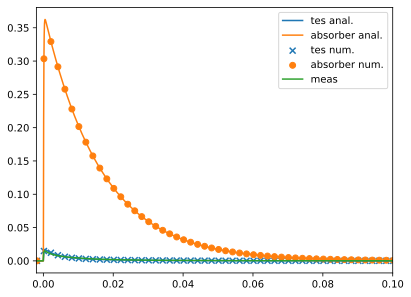

In [19]:
# det.set_control(dac=[1.662], Ib=[5], norm=False)

det.wait(5)

tp = False

if not tp:
    det.trigger(er=np.array([0., 0.1*(5.9 * 8/9 + 1/9 * 6.4)]), tpa=np.array([0.0]))
else:
    det.trigger(er=np.array([0., 0.]), tpa=np.array([1.0]))

evsim = det.get_record()

temps = det.get_temperatures()
thermal_ps = det.get_thermal_pulseshape(0.1*(5.9 * 8/9 + 1/9 * 6.4))

if not tp:
    plt.plot(det.t - det.t0, thermal_ps[0], label='tes anal.')
    plt.plot(det.t - det.t0, thermal_ps[1], label='absorber anal.')
plt.scatter(det.t[::50] - det.t0, temps[::50,0] - np.mean(temps[:2000,0]), label='tes num.', marker='x')
plt.scatter(det.t[::50] - det.t0, temps[::50,1] - np.mean(temps[:2000,1]), label='absorber num.', marker='o')
if not tp:
    plt.plot(det.kwargs['sev'][:,0] + 0.0013, det.kwargs['sev'][:,1]*0.015, label='meas')
else:
    plt.plot(det.kwargs['sev_tp'][:,0], det.kwargs['sev_tp'][:,1]*0.015, label='meas')
plt.legend()
plt.xlim(-0.002,0.1)
# plt.ylim(0,.05)
plt.show()

fit noise parameters

In [20]:
det.flicker_slope = np.array([1.5])

In [21]:
det.tes_fluct = np.array([9e-4])

In [22]:
det.excess_johnson = np.array([4.])

In [23]:
det.emi = np.array([[3e-5, 2e-5, 2e-5]])

sets see all together in action

In [24]:
# det.set_control(dac=[1.99], Ib=[5], norm=False)

det.wait(5)

det.trigger(er=np.array([0., 0.1 * (5.9 * 8/9 + 1/9 * 6.4)]), tpa=np.array([.0]))  # 0.1 * (5.9 * 8/9 + 1/9 * 6.4)

det.ph

T0 is [22.9272103  22.94445127] mK.
Calculated in 0.4842410087585449 s.
Generated noise in 0.0071828365325927734 s.


array([0.36394797])

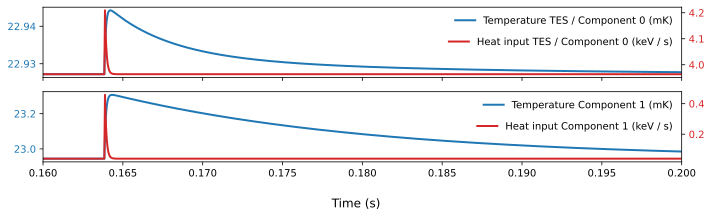

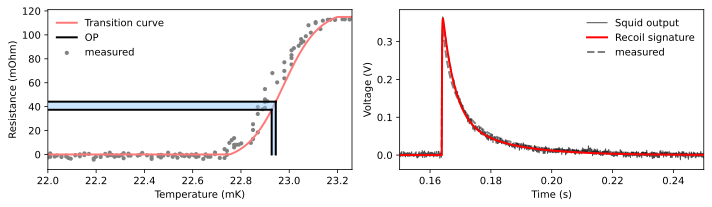

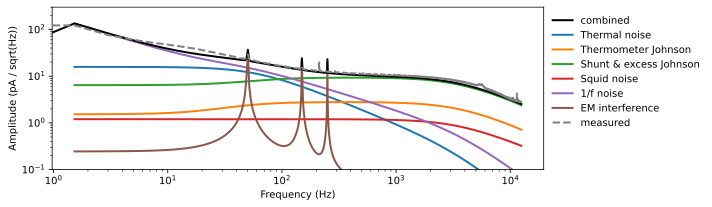

In [25]:
det.plot_temperatures(save_path=None, xlim=(0.16, 0.2), dpi=300)  # 'plots_paper/temperatures.png'

fig, axes = det.plot_tes(xlim_temp=(22., 23.26), xlim_time=(0.15, 0.25), save_path=None, show=False, dpi=300)  # 'plots_paper/tes.png'
axes[0].scatter(pars[name]['transition_curve'][:,0], 1e3*(pars[name]['transition_curve'][:,1] - .012)*115/(115-12.), 
                rasterized=True, color='grey', s=10, label='measured')
axes[1].plot(det.kwargs['sev'][:,0] + 0.0013 + 0.16384, det.kwargs['sev'][:,1]*3.3*0.1, linestyle='dashed', color='grey', linewidth=2, label='measured')
axes[0].set_title('')
axes[1].set_title('')
axes[0].legend(frameon=False)
axes[1].legend(frameon=False)
plt.tight_layout()
plt.show()

for i in range(det.nmbr_tes):
    det.plot_nps(tes_channel=i, only_sum=False, save_path=None, show=False, dpi=300)  # 'plots_paper/nps_tes_{}.png'.format(i)
    plt.loglog(det.kwargs['nps'][:,0], np.sqrt(det.kwargs['nps'][:,1])*1e6, color='grey', linestyle='dashed', linewidth=2, label='measured', zorder=100)
    plt.legend(frameon=False, bbox_to_anchor=(1., 1.))
    plt.ylim(1e-1, 3e2)
    plt.title('')
    plt.tight_layout()
    plt.show()

In [26]:
det.print_noise_parameters()

Resistance TES / Resistance normal conducting: 0.32499558545482726
Temperature mixing chamber: 15.0 mK
Temperature TES: 22.92721030406758 mK
Resistance TES: 37.374492327305134 mOhm
Tau eff: 3.8936460643825233 ms
TES Slope: 387.1066889648551 mOhm/mK
C: 1916.0586310832857 fJ / K 
Geff: 492.09881930733354 pW / K
Tau in: 3.8321172621665713 ms
Geb: 500.0 pW / K 
G ETF: -7.901180692666486 pW / K 
R shunt: 40.0 mOhm
Temperature shunt: 15.0 mK
i sq: 1.2 pA/sqrt(Hz)
1 / f amplitude (pW): 0.0009 
1 / f power (flicker slope): 1.5 
Tau el (s): 4.52345455811781e-06 
Tau I (s): 0.007172224136802374 
L_I (): 0.4657002919773417 


In [27]:
import copy

pars_cryoenv = copy.deepcopy(pars)

pars_cryoenv[name]['Gb'] = det.Gb
pars_cryoenv[name]['G'] = det.G 
pars_cryoenv[name]['Rh'] = det.Rh
pars_cryoenv[name]['eps'] = det.eps
pars_cryoenv[name]['pulser_scale'] = det.pulser_scale
pars_cryoenv[name]['delta'] = det.delta
pars_cryoenv[name]['flicker_slope'] = det.flicker_slope
pars_cryoenv[name]['tes_fluct'] = det.tes_fluct
pars_cryoenv[name]['excess_johnson'] = det.excess_johnson
pars_cryoenv[name]['emi'] = det.emi


In [28]:
fname = 'saved_pars/{}_pars_cryoenv.pkl'.format(name)

with open(fname, 'wb') as fh:
    pickle.dump(pars_cryoenv[name], fh)
    print('dictionary saved successfully to file {}'.format(fname))
    

dictionary saved successfully to file saved_pars/li1l_pars_cryoenv.pkl


In [29]:
name_load = name

with open("saved_pars/{}_pars_cryoenv.pkl".format(name_load),"rb") as fh:
    pars_load = pickle.load(fh)

In [30]:
pars_load

{'C': array([0.00097497, 0.00016102]),
 'Gb': array([0.5  , 0.005]),
 'G': array([[0.   , 0.005],
        [0.005, 0.   ]]),
 'lamb': array([9.39650411e-05, 9.39650411e-05]),
 'lamb_tp': array([0.00298]),
 'eps': array([[0.09914205, 0.90085795],
        [0.37      , 0.63      ]]),
 'Rs': array([0.04]),
 'Rh': array([7.0597519]),
 'L': array([3.5e-07]),
 'Rt0': array([0.115]),
 'k': array([13.50695211]),
 'Tc': array([22.97552941]),
 'Ib': array([1.50024]),
 'dac': array([6.9]),
 'pulser_scale': array([0.00625]),
 'heater_current': array([0.904]),
 'eta': array([5.76666667]),
 'tes_flag': array([ True, False]),
 'heater_flag': array([False,  True]),
 'i_sq': array([1.2]),
 'tes_fluct': array([0.0009]),
 'flicker_slope': array([1.5]),
 'emi': array([[3.e-05, 2.e-05, 2.e-05]]),
 'tau_cap': array([1]),
 'Ib_range': (0.0, 17.86),
 'excess_johnson': array([4.]),
 'R_op_target': 0.03737203907085551,
 'tau_eff': 0.003683678964822836,
 'tau_t': 0.017835028251184513,
 'nps': array([[0.00000000e+0